### CSDA1050 Capstone Project, Sprint 1
### The Effectiveness of Red Light Cameras in Toronto 
### submitted by Sima Sarvate

### Research Question

Are red light cameras that are situated in certain Toronto intersections effective in stopping drivers from running those red lights and thereby stemming the incidents of accidents there? 

### Introduction and Background

The red light camera program started in the City of Toronto in 2000. The aim of this program was to increase safety on the roads by reducing red light running. Red light running is the cause of injury and death to so many pedestrians and drivers alike, not to mention costing the taxpayer millions of dollars for emergency-response situations. On the other hand, it costs millions of taxpayer dollars to put this sort of program into place. That is why it is important to understand the effectiveness of such a program for any city who decides to put a pilot project of this sort into place. 

The first phase of this program in 2000 saw 10 red light cameras go up in selected intersections around the city. The second phase of the program, 2007-2016, saw 77 red light cameras go up. As of March, 2018 there were still 77 cameras in Toronto. The cameras work by capturing an image of a vehicle which has entered an intersection against a red traffic light as the camera is triggered when a vehicle enters the intersection after the traffic signal has turned red. The photograph is evidence that assists authorities in their enforcement of traffic laws, by issuing fines to the red light runner, thereby attempting to deter drivers from this sort of activity and behaviour.  
 

### Objectives of Sprint 1

1. Gather data that is pertinent to the analysis of the research question.
2. Prepare data for exploratory data analysis.
3. Do exploratory data analysis.

### 1. Data Gathering

The following datasets will be initially explored in the EDA:

1. Red Light Camera Data – List of red light cameras installed in the city of Toronto.

https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/red-light-cameras/


2. Red Light Data - This dataset is a subset of the Killed and Seriously Injured (KSI) dataset from 2008-2018. These events include any serious or fatal collision where red light running played a role in the collision.

http://data.torontopolice.on.ca/datasets/red-light/data


Other datasets that may be considered for the EDA after the initial EDA of the above 2 datsets include the following subsets of the KSI (Killed and Seriously Injured) dataset:
 
 Automobile
 
 Speeding
 
 Pedestrians
 
 Cyclist
 
 Aggressive Driving
 
 Passenger
 
 Fatal Collisions


### 2. Data Preparation and Preliminaries

The following packages must be installed for this project:

rtree

gdal

fiona

shapely

geopandas

pysal

missingno

Note: Installation should be done in the order listed above as the installation of some packages depend on other packages already being installed.

In [37]:
# load packages
import geopandas as gpd
import numpy as np
import pandas as pd
import scipy as sp
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

### 3. Exploratory Data Analysis

### Red Light Camera Data

In [38]:
# read red light camera data
cameras = gpd.read_file("Cameras.geojson")
cameras.head()

,_id,INTERSECTION_ID,LINEAR_NAME_FULL_1,LINEAR_NAME_FULL_2,ID,X,Y,LONGITUDE,LATITUDE,OBJECTID,geometry
0,1233,13457150,Dufferin St,Glencairn Ave,19,None,None,-79.453180,43.706983,1,POINT (-79.45318010588022 43.70698274215368)
1,1234,13464191,Dupont St,Lansdowne Ave,20,None,None,-79.446461,43.666726,2,POINT (-79.4464614030731 43.6667255135304)
2,1235,13465569,Dundas St E,Jarvis St,21,None,None,-79.374567,43.657067,3,POINT (-79.37456691819334 43.65706708759534)
3,1236,13464080,Coxwell Ave,Eastern Ave,22,None,None,-79.316215,43.665494,4,POINT (-79.3162154693632 43.66549388674469)
4,1237,13453221,Birchmount Rd,Eglinton Ave E,23,None,None,-79.277860,43.729962,5,POINT (-79.27785952913113 43.72996210644608)


In [39]:
# check the type of dataframe cameras
type(cameras)

geopandas.geodataframe.GeoDataFrame

In [40]:
# check the data type of the column containing coordinates
type(cameras.geometry)

geopandas.geoseries.GeoSeries

In [41]:
type(cameras.geometry[0])

shapely.geometry.point.Point

In [42]:
# get the number of columns (features) and rows (customers) for the cameras data
print ("Rows: ", cameras.shape[0])
print ("Columns: ", cameras.shape[1])

Rows:  77
Columns:  11


In [43]:
# let's get a list of features for the cameras dataset
print ("Features: \n", cameras.columns.tolist())

Features: 
 ['_id', 'INTERSECTION_ID', 'LINEAR_NAME_FULL_1', 'LINEAR_NAME_FULL_2', 'ID', 'X', 'Y', 'LONGITUDE', 'LATITUDE', 'OBJECTID', 'geometry']


In [44]:
# check the data types of all the columns
cameras.dtypes

_id                     int64
INTERSECTION_ID         int64
LINEAR_NAME_FULL_1     object
LINEAR_NAME_FULL_2     object
ID                      int64
X                      object
Y                      object
LONGITUDE             float64
LATITUDE              float64
OBJECTID                int64
geometry               object
dtype: object

In [45]:
# check for missing data
cameras.isnull().sum()

_id                    0
INTERSECTION_ID        0
LINEAR_NAME_FULL_1     0
LINEAR_NAME_FULL_2     0
ID                     0
X                     77
Y                     77
LONGITUDE              0
LATITUDE               0
OBJECTID               0
geometry               0
dtype: int64

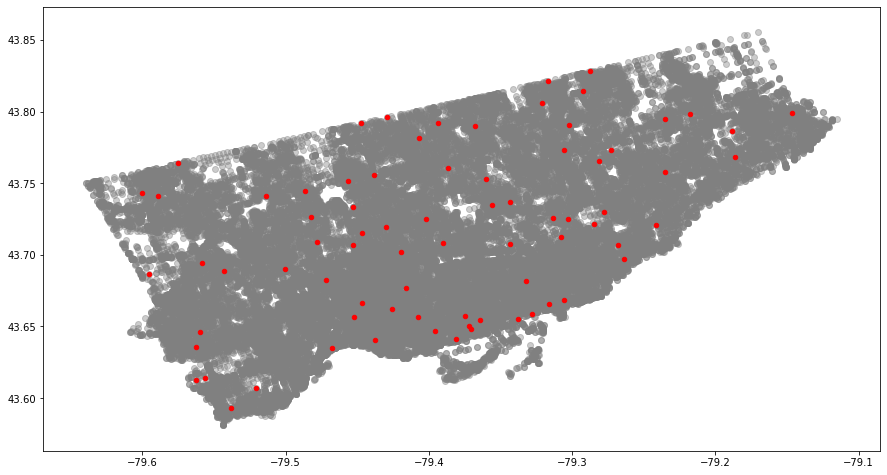

In [46]:
# plot the red light camera locations on a street map of Toronto
#
# display street map of Toronto
street_map_TO = gpd.read_file('CENTRELINE_INTERSECTION_WGS84.shp')
fig, ax = plt.subplots(figsize = (15,15))
street_map_TO.plot(color='grey', ax=ax, alpha = 0.4)
# plot the geopoints of the red light cameras onto the street map of Toronto
cameras['geometry'].plot(ax=ax, markersize=20, color='red', label="cameras")

### Red Light Data (Accidents)

In [47]:
# read in red light traffic data
red_light = pd.read_csv("Red_Light.csv")
red_light.head(100)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Division,Ward_Name,Ward_ID,Hood_ID,Hood_Name,ObjectId
0,-79.561664,43.645896,80489774,5001661734,2015,2015-09-26T04:00:00.000Z,1,0,BURNHAMTHORPE RD,427 C N BURNHAMTHORPE RAMP,...,Yes,Yes,Yes,,22,NaN,NaN,14,NaN,1
1,-79.561664,43.645896,80489775,5001661734,2015,2015-09-26T04:00:00.000Z,1,0,BURNHAMTHORPE RD,427 C N BURNHAMTHORPE RAMP,...,Yes,Yes,Yes,,22,NaN,NaN,14,NaN,2
2,-79.338990,43.658345,5345498,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,Yes,,,55,NaN,NaN,70,NaN,3
3,-79.338990,43.658345,5345499,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,Yes,,,55,NaN,NaN,70,NaN,4
4,-79.338990,43.658345,5345500,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,Yes,,,55,NaN,NaN,70,NaN,5
5,-79.338990,43.658345,5345501,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,Yes,,,55,NaN,NaN,70,NaN,6
6,-79.338990,43.658345,5345502,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,Yes,,,55,NaN,NaN,70,NaN,7
7,-79.215801,43.761779,80783074,7000557720,2017,2017-03-30T04:00:00.000Z,15,0,SCARBOROUGH GOLF CLUB RD,LAWRENCE AVE E,...,Yes,Yes,,,43,NaN,NaN,137,NaN,8
8,-79.215801,43.761779,80783179,7000557720,2017,2017-03-30T04:00:00.000Z,15,0,SCARBOROUGH GOLF CLUB RD,LAWRENCE AVE E,...,Yes,Yes,,,43,NaN,NaN,137,NaN,9
9,-79.215801,43.761779,80783180,7000557720,2017,2017-03-30T04:00:00.000Z,15,0,SCARBOROUGH GOLF CLUB RD,LAWRENCE AVE E,...,Yes,Yes,,,43,NaN,NaN,137,NaN,10


### NOTE
It seems that for each accident there can be more than one row. We need to take just one row when making charts. Otherwise our counts will be off.

In [49]:
# get the number of columns (features) and rows (customers) for the red light data
print ("Rows: ", red_light.shape[0])
print ("Columns: ", red_light.shape[1])

Rows:  959
Columns:  57


In [50]:
# let's get a list of features for the red light dataset
print ("Features: \n", red_light.columns.tolist())
print ("\n")
# let's get the number of unique values for each feature in our dataset
print ("Unique Values: ", red_light.nunique())

Features: 
 ['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'Division', 'Ward_Name', 'Ward_ID', 'Hood_ID', 'Hood_Name', 'ObjectId']


Unique Values:  X             243
Y             239
Index_        959
ACCNUM        263
YEAR           11
DATE          256
TIME          222
Hour           24
STREET1       139
STREET2       207
OFFSET         11
ROAD_CLASS      6
District        5
LATITUDE      239
LONGITUDE     243
LOCCOORD        2
ACCLOC          4
TRAFFCTL        1
VISIB

In [51]:
# check the data types of all the columns
red_light.dtypes

X             float64
Y             float64
Index_          int64
ACCNUM          int64
YEAR            int64
DATE           object
TIME            int64
Hour            int64
STREET1        object
STREET2        object
OFFSET         object
ROAD_CLASS     object
District       object
LATITUDE      float64
LONGITUDE     float64
LOCCOORD       object
ACCLOC         object
TRAFFCTL       object
VISIBILITY     object
LIGHT          object
RDSFCOND       object
ACCLASS        object
IMPACTYPE      object
INVTYPE        object
INVAGE         object
INJURY         object
FATAL_NO        int64
INITDIR        object
VEHTYPE        object
MANOEUVER      object
DRIVACT        object
DRIVCOND       object
PEDTYPE        object
PEDACT         object
PEDCOND        object
CYCLISTYPE     object
CYCACT         object
CYCCOND        object
PEDESTRIAN     object
CYCLIST        object
AUTOMOBILE     object
MOTORCYCLE     object
TRUCK          object
TRSN_CITY_     object
EMERG_VEH      object
PASSENGER 

In [52]:
# check for missing data
red_light.isnull().sum()


X               0
Y               0
Index_          0
ACCNUM          0
YEAR            0
DATE            0
TIME            0
Hour            0
STREET1         0
STREET2         0
OFFSET          0
ROAD_CLASS      0
District        0
LATITUDE        0
LONGITUDE       0
LOCCOORD        0
ACCLOC          0
TRAFFCTL        0
VISIBILITY      0
LIGHT           0
RDSFCOND        0
ACCLASS         0
IMPACTYPE       0
INVTYPE         0
INVAGE          0
INJURY          0
FATAL_NO        0
INITDIR         0
VEHTYPE         0
MANOEUVER       0
DRIVACT         0
DRIVCOND        0
PEDTYPE         0
PEDACT          0
PEDCOND         0
CYCLISTYPE      0
CYCACT          0
CYCCOND         0
PEDESTRIAN      0
CYCLIST         0
AUTOMOBILE      0
MOTORCYCLE      0
TRUCK           0
TRSN_CITY_      0
EMERG_VEH       0
PASSENGER       0
SPEEDING        0
AG_DRIV         0
REDLIGHT        0
ALCOHOL         0
DISABILITY      0
Division        0
Ward_Name     959
Ward_ID       959
Hood_ID         0
Hood_Name 

### NOTE
As noted earlier we need a unique occurence of each accident in the dataframe so that our charts will reflect accurate counts of accidents.

In [53]:
red_light_unique = red_light.drop_duplicates('ACCNUM')
red_light_unique.head(10)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Division,Ward_Name,Ward_ID,Hood_ID,Hood_Name,ObjectId
0,-79.561664,43.645896,80489774,5001661734,2015,2015-09-26T04:00:00.000Z,1,0,BURNHAMTHORPE RD,427 C N BURNHAMTHORPE RAMP,...,Yes,Yes,Yes,,22,NaN,NaN,14,NaN,1
2,-79.338990,43.658345,5345498,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,Yes,,,55,NaN,NaN,70,NaN,3
7,-79.215801,43.761779,80783074,7000557720,2017,2017-03-30T04:00:00.000Z,15,0,SCARBOROUGH GOLF CLUB RD,LAWRENCE AVE E,...,Yes,Yes,,,43,NaN,NaN,137,NaN,8
10,-79.470042,43.787211,80931233,7000036465,2017,2017-01-07T05:00:00.000Z,16,0,DUFFERIN ST,STEELES AVE W,...,Yes,Yes,Yes,,32,NaN,NaN,34,NaN,11
13,-79.300746,43.761183,80563132,6001066822,2016,2016-06-19T04:00:00.000Z,20,0,ELLESMERE RD,WARDEN AVE,...,Yes,Yes,,,41,NaN,NaN,119,NaN,14
20,-79.536220,43.753218,80877058,8000722475,2018,2018-04-23T04:00:00.000Z,20,0,FINCH AVE W,SIGNET DR,...,Yes,Yes,,,31,NaN,NaN,22,NaN,21
23,-79.281090,43.765745,5233038,1101613,2009,2009-04-28T04:00:00.000Z,24,0,ELLESMERE RD,KENNEDY RD,...,Yes,Yes,,,41,NaN,NaN,126,NaN,24
27,-79.235263,43.757712,80488133,5001405584,2015,2015-08-16T04:00:00.000Z,42,0,BELLAMY RD N,LAWRENCE AVE E,...,Yes,Yes,Yes,,43,NaN,NaN,137,NaN,28
32,-79.146220,43.798911,80502841,6000501397,2016,2016-03-24T04:00:00.000Z,42,0,KINGSTON RD,SHEPPARD AVE E,...,Yes,Yes,Yes,,42,NaN,NaN,133,NaN,33
34,-79.241756,43.774325,7536183,1340006,2012,2012-12-16T05:00:00.000Z,50,0,ELLESMERE Rd,BELLAMY Rd N,...,Yes,Yes,,,43,NaN,NaN,137,NaN,35


In [54]:
# How many red light accidents do we have now that we have taken out duplicate rows?
print ("Rows: ", red_light_unique.shape[0])

Rows:  263


YEAR
2008    34
2009    24
2010    23
2011    17
2012    29
2013    25
2014    26
2015    21
2016    20
2017    22
2018    22
Name: ACCNUM, dtype: int64


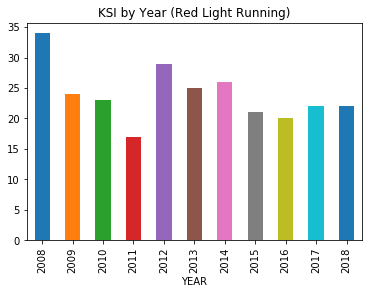

In [55]:
# analyse accidents by year
# get count of accidents by year, then print and plot
KSI_Count_Year = red_light_unique.groupby('YEAR')['ACCNUM'].count()
print(KSI_Count_Year)
KSI_Count_Year.plot(kind='bar', title='KSI by Year (Red Light Running)')

Hour
0     12
1      8
2      4
3     10
4      1
5     10
6      9
7     13
8      8
9     13
10    13
11    16
12    13
13     7
14    14
15    18
16    21
17     8
18    21
19     5
20    18
21    10
22     6
23     5
Name: ACCNUM, dtype: int64


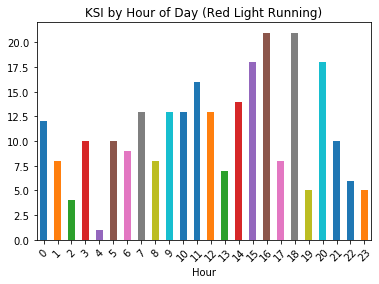

In [56]:
# analyse accidents by the hour of day
# get count of accidents by hour, then print and plot
KSI_Count_Hour = red_light_unique.groupby('Hour')['ACCNUM'].count()
print(KSI_Count_Hour)
KSI_Count_Hour.plot(kind='bar', title='KSI by Hour of Day (Red Light Running)', rot=45)

In [66]:
# analyse accidents by the age of red light runner
# what are the unique values age column
print (red_light['INVAGE'].unique())

['30 to 34' '20 to 24' 'unknown' '35 to 39' '40 to 44' '15 to 19'
 '55 to 59' '70 to 74' '65 to 69' '75 to 79' '25 to 29' '50 to 54'
 '45 to 49' '60 to 64' '5 to 9' '0 to 4' '80 to 84' '85 to 89' '10 to 14'
 '90 to 94' 'Over 95']


INVAGE
0 to 4       1
10 to 14     1
15 to 19    12
20 to 24    27
25 to 29    17
30 to 34    17
35 to 39    16
40 to 44    19
45 to 49    26
50 to 54    23
55 to 59    10
60 to 64    22
65 to 69    12
70 to 74     6
75 to 79     7
80 to 84     6
85 to 89     2
Over 95      1
unknown     38
Name: ACCNUM, dtype: int64


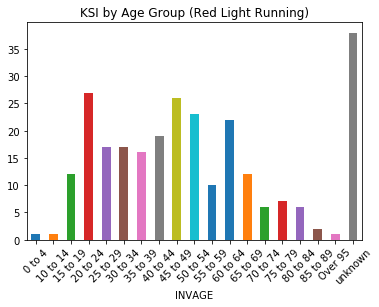

In [68]:
# Count accidents by age group
KSI_Count_Age_Group = red_light_unique.groupby('INVAGE')['ACCNUM'].count()
print(KSI_Count_Age_Group)
KSI_Count_Age_Group.plot(kind='bar', title='KSI by Age Group (Red Light Running)', rot=45)

In [72]:
# let's convert our red light data DataFrame into a GeoDataFrame and create geopoints using the longitude and latitude 
# values for each accident location into a geopoint to be plotted on a street map of Toronto
geo_red_light = gpd.GeoDataFrame(
    red_light, geometry=gpd.points_from_xy(red_light.LONGITUDE, red_light.LATITUDE))
geo_red_light.head(10)


,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,REDLIGHT,ALCOHOL,DISABILITY,Division,Ward_Name,Ward_ID,Hood_ID,Hood_Name,ObjectId,geometry
0,-79.561664,43.645896,80489774,5001661734,2015,2015-09-26T04:00:00.000Z,1,0,BURNHAMTHORPE RD,427 C N BURNHAMTHORPE RAMP,...,Yes,Yes,,22,NaN,NaN,14,NaN,1,POINT (-79.56166400000001 43.645896)
1,-79.561664,43.645896,80489775,5001661734,2015,2015-09-26T04:00:00.000Z,1,0,BURNHAMTHORPE RD,427 C N BURNHAMTHORPE RAMP,...,Yes,Yes,,22,NaN,NaN,14,NaN,2,POINT (-79.56166400000001 43.645896)
2,-79.338990,43.658345,5345498,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,,,55,NaN,NaN,70,NaN,3,POINT (-79.33899 43.658345)
3,-79.338990,43.658345,5345499,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,,,55,NaN,NaN,70,NaN,4,POINT (-79.33899 43.658345)
4,-79.338990,43.658345,5345500,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,,,55,NaN,NaN,70,NaN,5,POINT (-79.33899 43.658345)
5,-79.338990,43.658345,5345501,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,,,55,NaN,NaN,70,NaN,6,POINT (-79.33899 43.658345)
6,-79.338990,43.658345,5345502,1031943,2008,2008-03-13T04:00:00.000Z,10,0,CARLAW AVE,EASTERN AVE,...,Yes,,,55,NaN,NaN,70,NaN,7,POINT (-79.33899 43.658345)
7,-79.215801,43.761779,80783074,7000557720,2017,2017-03-30T04:00:00.000Z,15,0,SCARBOROUGH GOLF CLUB RD,LAWRENCE AVE E,...,Yes,,,43,NaN,NaN,137,NaN,8,POINT (-79.215801 43.761779)
8,-79.215801,43.761779,80783179,7000557720,2017,2017-03-30T04:00:00.000Z,15,0,SCARBOROUGH GOLF CLUB RD,LAWRENCE AVE E,...,Yes,,,43,NaN,NaN,137,NaN,9,POINT (-79.215801 43.761779)
9,-79.215801,43.761779,80783180,7000557720,2017,2017-03-30T04:00:00.000Z,15,0,SCARBOROUGH GOLF CLUB RD,LAWRENCE AVE E,...,Yes,,,43,NaN,NaN,137,NaN,10,POINT (-79.215801 43.761779)


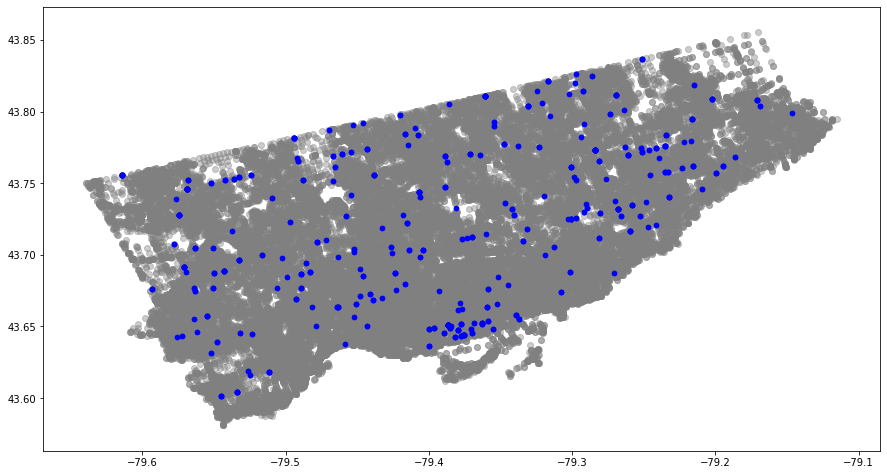

In [74]:
# plot the accident locations on a street map of Toronto
#
# display street map of Toronto
street_map_TO = gpd.read_file('CENTRELINE_INTERSECTION_WGS84.shp')
fig, ax = plt.subplots(figsize = (15,15))
street_map_TO.plot(color='grey', ax=ax, alpha = 0.4)
# plot the geopoints of the red light accidents onto the street map of Toronto
geo_red_light['geometry'].plot(ax=ax, markersize=20, color='blue', label="accidents")

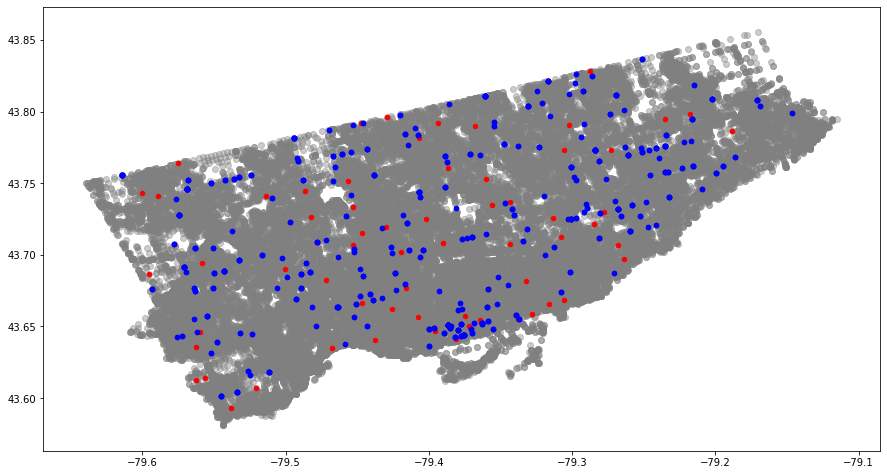

In [75]:
# plot the accident locations and camera locations on a street map of Toronto
# cameras in red
# accidents in blue
#
# display street map of Toronto
street_map_TO = gpd.read_file('CENTRELINE_INTERSECTION_WGS84.shp')
fig, ax = plt.subplots(figsize = (15,15))
street_map_TO.plot(color='grey', ax=ax, alpha = 0.4)
# plot the geopoints of the red light cameras onto the street map of Toronto
cameras['geometry'].plot(ax=ax, markersize=20, color='red', label="cameras")
# plot the geopoints of the red light accidents onto the street map of Toronto
geo_red_light['geometry'].plot(ax=ax, markersize=20, color='blue', label="accidents")